# Unsupervised Learning
## Clustering tech workers into mental health personas

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### Loading the Dataset

In [2]:
print("="*60)
print("MENTAL HEALTH IN TECH - CLUSTERING ANALYSIS")
print("="*60)

df = pd.read_csv('mental_health_cleaned.csv')
print(f"Dataset loaded successfully: {df.shape[0]} samples, {df.shape[1]} features")

MENTAL HEALTH IN TECH - CLUSTERING ANALYSIS
Dataset loaded successfully: 1259 samples, 27 features


### Feature Selection

In [3]:
# Selecting Features for Clustering
X = df[['family_history', 'treatment', 'work_interfere', 'remote_work', 'coworkers', 'supervisor']]
print(f"\nSelected features for clustering:")
for i, feature in enumerate(X.columns, 1):
    print(f"{i}. {feature}")

print(f"\nFeature details:")
print(X.info())
print(f"\nMissing values:")
print(X.isnull().sum())


Selected features for clustering:
1. family_history
2. treatment
3. work_interfere
4. remote_work
5. coworkers
6. supervisor

Feature details:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   family_history  1259 non-null   object
 1   treatment       1259 non-null   object
 2   work_interfere  1259 non-null   object
 3   remote_work     1259 non-null   object
 4   coworkers       1259 non-null   object
 5   supervisor      1259 non-null   object
dtypes: object(6)
memory usage: 59.1+ KB
None

Missing values:
family_history    0
treatment         0
work_interfere    0
remote_work       0
coworkers         0
supervisor        0
dtype: int64


### Data preprocessing with One-Hot Encoding

In [4]:
encoder = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), X.columns)
])

X_encoded = encoder.fit_transform(X)
print(f"\nAfter One-Hot Encoding: {X_encoded.shape[1]} features")

# Apply t-SNE for dimensionality reduction
print(f"\nApplying t-SNE dimensionality reduction")
tsne = TSNE(n_components=2, random_state=42, perplexity=30, max_iter=1000)
X_tsne = tsne.fit_transform(X_encoded)
print(f"t-SNE completed: Data reduced to 2D")


After One-Hot Encoding: 16 features

Applying t-SNE dimensionality reduction
t-SNE completed: Data reduced to 2D


### Silhouette Score Analysis for KMeans

In [5]:
fig = plt.figure(figsize=(20, 15))
print(f"\n" + "="*40)
print("KMEANS CLUSTERING ANALYSIS")
print("="*40)

kmeans_scores = []
for k in range(2, 11):
    model = KMeans(random_state=42, n_clusters=k)
    labels = model.fit_predict(X_tsne)
    score = silhouette_score(X_tsne, labels)
    kmeans_scores.append(score)
    print(f"k={k}: Silhouette Score = {score:.4f}")

print(f"\nKMeans Scores: {[round(score, 4) for score in kmeans_scores]}")


KMEANS CLUSTERING ANALYSIS
k=2: Silhouette Score = 0.3816
k=3: Silhouette Score = 0.4127
k=4: Silhouette Score = 0.4234
k=5: Silhouette Score = 0.3819
k=6: Silhouette Score = 0.3940
k=7: Silhouette Score = 0.4163
k=8: Silhouette Score = 0.4044
k=9: Silhouette Score = 0.4274
k=10: Silhouette Score = 0.4289

KMeans Scores: [0.3816, 0.4127, 0.4234, 0.3819, 0.394, 0.4163, 0.4044, 0.4274, 0.4289]


<Figure size 2000x1500 with 0 Axes>

### Silhouette Score Analysis for Agglomerative

In [6]:
print(f"\n" + "="*40)
print("AGGLOMERATIVE CLUSTERING ANALYSIS")
print("="*40)

aglo_scores = []
for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X_tsne)
    score = silhouette_score(X_tsne, labels)
    aglo_scores.append(score)
    print(f"k={k}: Silhouette Score = {score:.4f}")

print(f"\nAgglomerative Scores: {[round(score, 4) for score in aglo_scores]}")



AGGLOMERATIVE CLUSTERING ANALYSIS
k=2: Silhouette Score = 0.3734
k=3: Silhouette Score = 0.4164
k=4: Silhouette Score = 0.4226
k=5: Silhouette Score = 0.3892
k=6: Silhouette Score = 0.3795
k=7: Silhouette Score = 0.3942
k=8: Silhouette Score = 0.3979
k=9: Silhouette Score = 0.4219
k=10: Silhouette Score = 0.4183

Agglomerative Scores: [0.3734, 0.4164, 0.4226, 0.3892, 0.3795, 0.3942, 0.3979, 0.4219, 0.4183]


### Finding Best K Values

In [7]:
best_k_kmeans = np.argmax(kmeans_scores) + 2
best_k_aglo = np.argmax(aglo_scores) + 2
print(f"\nBest k for KMeans: {best_k_kmeans} (Score: {max(kmeans_scores):.4f})")
print(f"Best k for Agglomerative: {best_k_aglo} (Score: {max(aglo_scores):.4f})")



Best k for KMeans: 10 (Score: 0.4289)
Best k for Agglomerative: 4 (Score: 0.4226)


#### well for k=4 and k=10 there's not much difference in Score for Kmeans

### Graphs and Plots

#### Score Comparison Graph

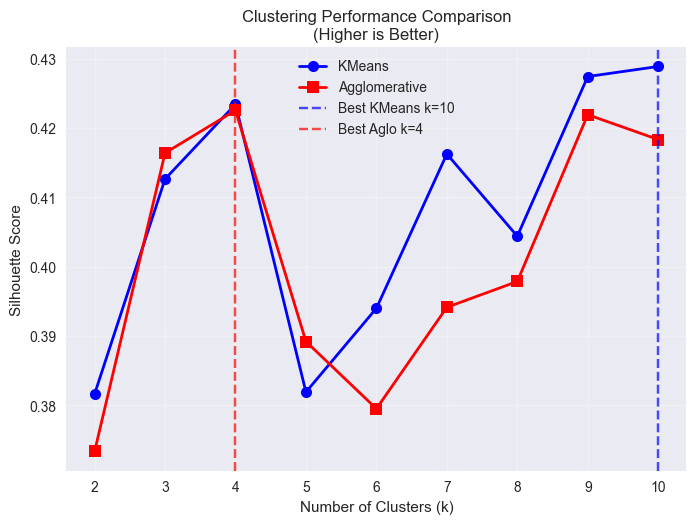

In [8]:
plt.plot(range(2, 11), kmeans_scores, marker='o', linewidth=2, markersize=8, label='KMeans', color='blue')
plt.plot(range(2, 11), aglo_scores, marker='s', linewidth=2, markersize=8, label='Agglomerative', color='red')
plt.axvline(x=best_k_kmeans, color='blue', linestyle='--', alpha=0.7, label=f'Best KMeans k={best_k_kmeans}')
plt.axvline(x=best_k_aglo, color='red', linestyle='--', alpha=0.7, label=f'Best Aglo k={best_k_aglo}')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Clustering Performance Comparison\n(Higher is Better)')
plt.legend()
plt.grid(True, alpha=0.3)


### Graphical Representation of Clusters

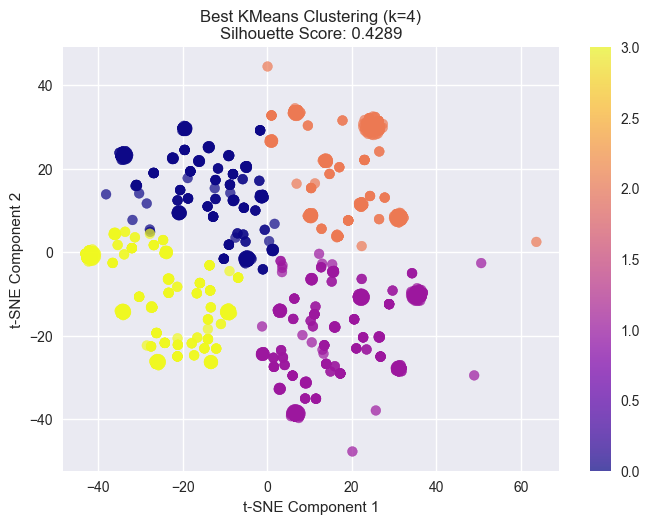

In [9]:
best_k_kmeans = 4
best_kmeans_model = KMeans(n_clusters=best_k_kmeans, random_state=42)
best_kmeans_labels = best_kmeans_model.fit_predict(X_tsne)
scatter3 = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=best_kmeans_labels, cmap='plasma', alpha=0.7, s=50)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title(f'Best KMeans Clustering (k={best_k_kmeans})\nSilhouette Score: {max(kmeans_scores):.4f}')
plt.colorbar(scatter3)

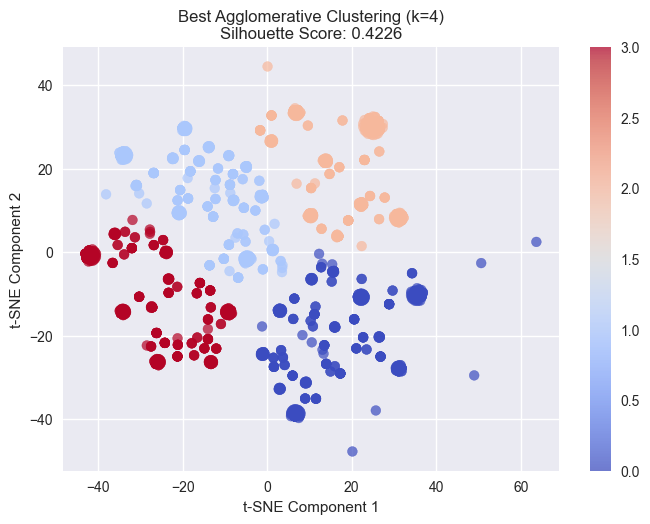

In [10]:
best_aglo_model = AgglomerativeClustering(n_clusters=best_k_aglo)
best_aglo_labels = best_aglo_model.fit_predict(X_tsne)
scatter4 = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=best_aglo_labels, cmap='coolwarm', alpha=0.7, s=50)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title(f'Best Agglomerative Clustering (k={best_k_aglo})\nSilhouette Score: {max(aglo_scores):.4f}')
plt.colorbar(scatter4)

### Conclusion

In [11]:
print(f"\n" + "="*40)
print("FINAL SUMMARY")
print("="*40)

print(f"Dataset Summary:")
print(f"  • Total samples: {len(df)}")
print(f"  • Features used: {len(X.columns)}")
print(f"  • Encoded features: {X_encoded.shape[1]}")

print(f"\nBest Clustering Results:")
print(f"  • KMeans: k={best_k_kmeans}, Silhouette Score = {max(kmeans_scores):.4f}")
print(f"  • Agglomerative: k={best_k_aglo}, Silhouette Score = {max(aglo_scores):.4f}")

if max(kmeans_scores) > max(aglo_scores):
    print(f"  • Recommended: KMeans with {best_k_kmeans} clusters")
else:
    print(f"  • Recommended: Agglomerative with {best_k_aglo} clusters")



FINAL SUMMARY
Dataset Summary:
  • Total samples: 1259
  • Features used: 6
  • Encoded features: 16

Best Clustering Results:
  • KMeans: k=4, Silhouette Score = 0.4289
  • Agglomerative: k=4, Silhouette Score = 0.4226
  • Recommended: KMeans with 4 clusters


In [12]:
import joblib
joblib.dump(best_kmeans_model, "Unsupervised_model.pkl")

['Unsupervised_model.pkl']